In [35]:
%%capture
from IPython.display import HTML
import matplotlib
import math
import numpy
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipywidgets import interactive
from IPython.display import display

In [2]:
###############################################
#  Ignorar. CSS para centrar plots de Python  #
###############################################
HTML(''' 
  <style>  
    .output_png {
        display: table-cell;
        text-align: center;
        vertical-align: middle;
    }
  </style>''')

<h1>Historia del Arcoiris</h1>

<h3>Gota esférica sin dispersión </h3>

En esta primera aproximación consideraremos el sistema formado por una gota esférica en la que los rayos solares inciden paralelos a la horizontal y en la cual no considreamos variación del índice de refracción con la longitud de onda (es decir no tendremos en cuenta el fenomeno de dispersión).

El sistema en cuestión es el presentado en la figura siguiente: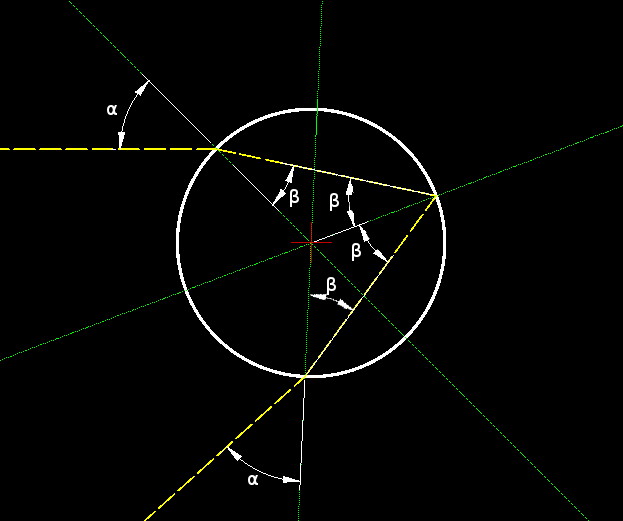

<br>
Las líneas amarillas representan el haz luminoso, mientras que las verdes corresponden con las normales a la superficie de la gota. El ángulo $\alpha$, es el ángulo de incidencia que forma el haz luminoso con la normal, mientras que $\beta$ corresponde con el ángulo de refracción. Este último ángulo puede ser calculado de manera inmediata aplicando la <i>ley de Snell</i> para la refracción: $$n_1 \sin{\alpha} = n_2 \sin{\beta} \rightarrow \beta = \arcsin{\left({{n_1}\over{n_2}}\sin{\alpha}\right)} $$
<br>
Es importaten destacar el hecho de la existencia de una desviación en la dirección del rayo saliente respecto del entrante, ya que será esta desviación uno de las factores más importantes para poder explicar la existencia del arcoiris. Como es de esperar, dicha desviación va a depender del ángulo de incidencia $\alpha$ y lo denotaremos como $D(\alpha)$. La desviación podrá calcularse, de manera sencilla, aplicando argumentos geométricos. Alargando los rayos incidente y saliente hasta cortarse: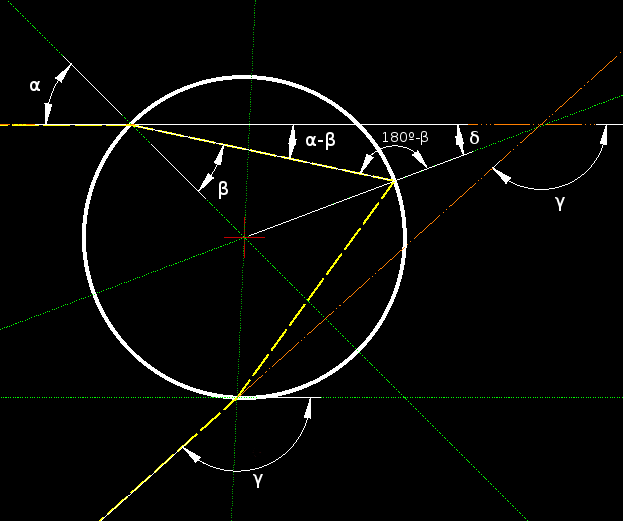
<br>
Donde $D(\alpha)=\gamma=180º - 2\delta$. Por otro lado, teniendo en cuenta que la suma de los ángulos de un triangulo es $180º$, obtenemos que el valor de $\delta$ viene dado por: $$\delta = 180º - (180º-\beta) - (\alpha - \beta) = 2\beta - \alpha$$
Y por tanto, la desviación estará relacionada con el ángulo de incidencia por: 
$$D(\alpha)=180º-2\delta=180º + 2\alpha -4\beta = 180º + 2\alpha -4 \arcsin{\left({{n_1}\over{n_2}}\sin{\alpha}\right)}$$

In [64]:
def deviation_alpha(alpha):
    gamma = 180 + 2*alpha-4*numpy.degrees(numpy.arcsin(1/1.33*numpy.sin(numpy.radians(alpha))))
    return gamma

def plot1_func(alpha):
    alpha_range = numpy.linspace(0,alpha,10000)

    plt.figure(figsize=(8,8))
    plot_deviation=plt.plot(alpha_range,deviation_alpha(alpha_range))
    plt.xlabel("Ángulo de incidencia α (°)",fontsize = 15)
    plt.ylabel("Ángulo de desviación γ (°)",fontsize = 15)
    plt.figtext(0.5, 0.001, "Medio: Agua. Índice de refracción: n=1.33", horizontalalignment='center')
    plt.title("Dependencia del ángulo de desviación con el de incidencia",fontsize=20,fontweight='bold')

interact(plot1_func, alpha = widgets.FloatSlider(value=90,
                                           min=90,
                                           max=1800,
                                           step=50))
plt.show()
plt.close()

interactive(children=(FloatSlider(value=90.0, description='alpha', max=1800.0, min=90.0, step=50.0), Output()), _dom_classes=('widget-interact',))

Analizando la figura anterior, podemos observar la existencia de un mínimo en el ángulo de desviación (y un máximo para $\delta$) entorno a la posición de $60º$. Dicho minimo será de grán importancia para la obtención del arcoiris, ya que en el entorno de ese punto se acumulan una mayor cantidad de rayos salientes con un ángulo muy parecido. Esto provoca una mayor densidad de rayos luminosos, y por ende una mayor intensidad. La cuestión de centrarnos en el intervalo $0º-90º$ se debe a la forma en la que hemos definido nuestro sistema problema, correspondiendo los $0º$ a la incidenciaa normal, y $90º$ a una incidencia rasante, como era de esperar. Sin embargo ampliando el intervalo vemos un comportamiento periodico de la función; correspondiendo el siguiente mínimo local, aproximadamente, a una incidencia de unos $60º$ negativos, y el ángulo de desviación $D(\alpha)\approx 222º = -138º$. Si continuamos ampliando, veremos de nuevo otro mínimo correspondiente a un ángulo de incidencia de $60º$ más el número de vueltas correspondiente.
<br>

Tomando la condición de la primera derivada de $D(\alpha)$ nula, obtendremos el valor exacto de dicho mínimo:
$$\frac{d D(\alpha)}{d \alpha} = 0 = 2-4\frac{n_1}{n_2}\cos(\alpha)\left(1-\frac{n_1^2}{n_2^2} \sin^2(\alpha)\right)^{-\frac{1}{2}}$$
En el caso concreto a estudiar en el que $n_1 = 1$ (aire) y $n_2 = 1.33$ (Agua. Despreciando variación con la longitud de onda) obtenemos: 
$$\alpha \approx 59.5847º \rightarrow D(\alpha) \approx 137.4836º $$ 
<br> 

Por último cabe destacar la relación existente entre el ángulo de desviación y el radio de la gota de agua. Como él angulo de desviacion es una función de $\alpha$, primeramente deberemos encontrar la dependencia de este con el radio de la órbita. Es fácil demostrar, aplicando argumentos trigonométricos de nuevo, que se cumple la relación:
$$\alpha=\arcsin \left(\frac{h}{r}\right) $$ 
Donde $r$ es el radio de la órbita y $h$, la altura respecto a la horizontal que divide a la gota por la mitad. Si sustituimos la expresión anterior en la función $D(\alpha)$:
$$ D(\alpha) = 180º + 2\arcsin\left(\frac{h}{r}\right) -4 \arcsin{\left({{n_1}\over{n_2}}\frac{h}{r}\right)}$$
<br>
En la gráfica a continuación representaremos el ángulo de desviacion en función del radio de la gota para un valor fijado de $h$ y viceversa: 

In [125]:
try: 
    def deviation_rh(radius,height):
        gamma = 180 + 2*numpy.degrees((numpy.arcsin(height/radius)))-4*numpy.degrees(numpy.arcsin(1/1.33*height/radius))
        return gamma


    def plot_deviation_radius(radius,height):
        if(height>radius):
            print("Error: El valor de la altura debe ser menor que el valor del radio!")
        figure2 = plt.figure(figsize=(16,8))

        radius_range = numpy.linspace(height,radius,100)
        plot1 = figure2.add_subplot(121)
        plot1.plot(radius_range,deviation_rh(radius_range,height))

        height_range = numpy.linspace(0,height,100)
        plot2 = figure2.add_subplot(122)
        plot2.plot(height_range,deviation_rh(radius,height_range))

        plot1.set_xlabel("Radio de la gota (unidades arbitrarias)",fontsize = 15)
        plot1.set_ylabel("Ángulo de desviación γ (°)",fontsize = 15)
        plot1.set_title("Dependencia del ángulo de desviación con el radio\n (h="+str(height)+")",fontsize=15,fontweight='bold')
        plot2.set_xlabel("Altura rayo incidente (unidades arbitrarias)",fontsize = 15)
        plot2.set_ylabel("Ángulo de desviación γ (°)",fontsize = 15)
        plot2.set_title("Dependencia del ángulo de desviación con la altura del rayo incidente\n (r="+str(radius)+")",fontsize=12,fontweight='bold')
        plt.figtext(0.5, 0.001, "Medio: Agua. Índice de refracción: n=1.33", horizontalalignment='center')


    #def plot_deviation_height(radius,height):
        #height_range = numpy.linspace(0,height,1000)
        #plot1 = figure2.add_subplot(122)
        #plot1.plot(height_range,deviation_rh(radius,height_range))
        #plt.xlabel("Altura del rayo incidente (unidades arbitrarias))",fontsize = 15)
        #plt.ylabel("Ángulo de desviación γ (°)",fontsize = 15)
        #plt.figtext(0.5, 0.001, "Medio: Agua. Índice de refracción: n=1.33", horizontalalignment='center')
        #plt.title("Dependencia del ángulo de desviación con la altura del rayo incidente",fontsize=20,fontweight='bold')
    interact(plot_deviation_radius,radius = widgets.FloatSlider(value=1,
                                               min=0.1,
                                               max=10,
                                               step=0.1), 
              height = widgets.FloatSlider(value=0.1,
                                               min=0,
                                               max=10,
                                               step=0.1))
    #display(w)
    plt.show()
    #w.result[0]
    #plot_deviation_radius(w.result[0],w.result[1])
    #plot_deviation_height(w.result[0],w.result[1])

    
except:
    pass
        

interactive(children=(FloatSlider(value=1.0, description='radius', max=10.0, min=0.1), FloatSlider(value=0.1, description='height', max=10.0), Output()), _dom_classes=('widget-interact',))

In [4]:
################################################
# Ignorar. Script para ocultar celdas de codigo#
################################################
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
    $('div.input').hide();
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
 } else {
    $('div.input').show();
    $('div.prompt').show();
    $('div.back-to-top').show();
    $('nav#menubar').show();
    $('.breadcrumb').show();
    $('.hidden-print').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')